In [1]:
import os
import torch
import matplotlib.pyplot as plt

os.chdir('../')
print("Current working directory:", os.getcwd())

Current working directory: /storage2T/github/DomId


# Obtain pretrained Weights for SDCN

The initial phase of training an SDCN model involves the pretraining of the weights for the convolutional encoder and decoder layers. Thus, our first experiment will concentrate on an Autoencoder (AE) model. It's important to note that the AE training only uses reconstruction loss (MSE), without incorporating any clustering-specific loss function. The clustering is performed post-hoc by applying the K-means algorithm to the latent space representations generated by the AE. Meaning that there's no specific clustering loss objective incorporated in the deep learning model or training at this stage.

For the purposes of this tutorial, we will limit the AE training to just two epochs and will operate on a reduced dataset, as indicated by the `subset_step=10` (default) parameter. This approach is not expected to yield highly refined feature representations, but it is sufficient for demonstrating the functionality of the DomId Python package's API. Keep in mind that this setup is designed for educational purposes and to provide a basic understanding of the process, rather than to achieve optimal model performance.

In [2]:
from domid.mk_exp import mk_exp
exp = mk_exp(task='mnistcolor10', model='ae', 
             trainer='ae',
             train_domain = '0 1 2 3 4 5 6 7 8 9', 
             test_domain='0', 
             batchsize=256, pre_tr=1, epos=2,
             model_method="cnn", nocu=False)

The sets of training and test domains overlap -- be aware of data leakage or training to the test!


Namespace(config_file=None, lr=0.0001, gamma_reg=0.1, es=1, seed=0, nocu=False, device=None, gen=False, keep_model=False, epos=2, epos_min=0, epo_te=1, warmup=100, debug=False, dmem=False, no_dump=False, trainer='ae', out='zoutput', dpath='zdpath', tpath=None, npath=None, npath_dom=None, npath_argna2val=None, nname_argna2val=None, nname=None, nname_dom=None, apath=None, exptag='exptag', aggtag='aggtag', bm_dir=None, plot_data=None, outp_dir='zoutput/benchmarks/shell_benchmark', param_idx=True, msel='val', model='ae', acon=None, task='mnistcolor10', bs=256, split=0, te_d=['0'], tr_d=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], san_check=False, san_num=8, loglevel='DEBUG', zd_dim=64, zx_dim=0, zy_dim=64, topic_dim=3, nname_encoder_x2topic_h=None, npath_encoder_x2topic_h=None, nname_encoder_sandwich_x2h4zd=None, npath_encoder_sandwich_x2h4zd=None, gamma_y=None, gamma_d=None, beta_t=1.0, beta_d=1.0, beta_x=1.0, beta_y=1.0, tau=0.05, epos_per_match_update=5, epochs_ctr=1, nperm=31, p

/storage2T/cache/pypoetry/virtualenvs/domid-99PrLA_U-py3.10/lib/python3.10/site-packages/domainlab/tasks/a_task.py:169: RuntimeWarning: The sets of training and test domains overlap -- be aware of data leakage or training to the test!
  warnings.warn(


no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets



using device: cuda

The sets of training and test domains overlap -- be aware of data leakage or training to the test!
/storage2T/cache/pypoetry/virtualenvs/domid-99PrLA_U-py3.10/lib/python3.10/site-packages/domainlab/tasks/a_task.py:169: RuntimeWarning: The sets of training and test domains overlap -- be aware of data leakage or training to the test!
  warnings.warn(


no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets





!!!: not committed yet
/storage2T/cache/pypoetry/virtualenvs/domid-99PrLA_U-py3.10/lib/python3.10/site-packages/domainlab/utils/get_git_tag.py:16: UserWarning: !!!: not committed yet
  warnings.warn("!!!: not committed yet")



b'ffa4eb7'
The sets of training and test domains overlap -- be aware of data leakage or training to the test!
/storage2T/cache/pypoetry/virtualenvs/domid-99PrLA_U-py3.10/lib/python3.10/site-packages/domainlab/tasks/a_task.py:169: RuntimeWarning: The sets of training and test domains overlap -- be aware of data leakage or training to the test!
  warnings.warn(
model name: mnistcolor10_te_rgb_31_119_180_ae_bffa4eb7_not_commited_2024md_03md_13_15_25_05_seed_0


ModelAE(
  (encoder): ConvolutionalEncoder(
    (conv_block1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv_block2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv_block3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (encod): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (z_layer): Linear(in_features=2048, out_features=64, bias=True)
    (bsnorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bsnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bsnorm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (decoder): ConvolutionalDecoder(
    (linear): Linear(in_features=64, out_featu

In [3]:
exp.execute()


 Experiment start at : 2024-03-13 15:25:05.745635
before training, model accuracy: (0.11786684782608696, array([[62, 47, 54, 63, 49, 54, 53, 60, 73, 43],
       [59, 65, 59, 70, 58, 49, 38, 63, 87, 53],
       [62, 47, 82, 60, 58, 48, 48, 57, 79, 52],
       [61, 62, 56, 85, 52, 66, 46, 61, 66, 66],
       [54, 49, 76, 70, 71, 59, 58, 64, 65, 55],
       [56, 50, 80, 75, 59, 60, 45, 52, 75, 54],
       [55, 57, 65, 59, 49, 46, 61, 60, 74, 42],
       [46, 47, 60, 64, 61, 64, 62, 71, 66, 60],
       [62, 43, 71, 61, 51, 53, 53, 49, 79, 51],
       [55, 50, 66, 55, 50, 61, 34, 58, 59, 58]]), 0.23284646739130435, array([[116,  43,  51,  25,  64,  17, 100,  26,  42,  74],
       [  0, 172, 104, 149,   0,   0,  30,  97,  49,   0],
       [ 30,  57, 181,  26,  60,  83,  72,  26,  58,   0],
       [ 26,  75,  26, 109,  29, 138,   0,  78,  84,  56],
       [  0,  60,  50,  26, 167, 123,  41, 102,   0,  52],
       [  0,  44,  61,  82,  56, 125,   0,  59, 103,  76],
       [ 22,  24,  55,  25,

/storage2T/github/DomId/domid/algos/observers/c_obvisitor_clustering.py:107: UserWarning: failed to delete model
  warnings.warn("failed to delete model")


In [4]:
save_dir = exp.trainer.storage.ex_path

In [5]:
print(save_dir)

./notebooks/2024-03-13_15:25:05.701208_mnistcolor10_ae


The weights for the encoding and decoder layers are now saved in the `save_dir` outline above. In the pickle format the following items are being saved:
* 'commandline_arguments' - the full list of arguments from the parser
* Z_space.npy - latent representation of all of the samples (zd_dim for all the samples)
* losses_accuracies - loss/clustering accuracy for each of the epoch
* clustering_results.csv - output results are stored for each of the samples in the dataset

For the SDCN experiment, to all of the above, graph information is also being stored in this folder.

# SDCN Training

Now since the AE has been pretrained, we can initialize and train SDCN model.

As before, note that we limit the training to just two epochs and operate on a reduced dataset, which will not result in a refined model, but is sufficient for demonstrating the functionality of the DomId Python package's API. Thus, this experiment is designed for educational purposes and to provide a basic understanding of the process, rather than to achieve optimal model performance.

In [6]:
exp = mk_exp(task='mnistcolor10', model='sdcn', 
             trainer='sdcn',
             train_domain = '0 1 2 3 4 5 6 7 8 9', 
             test_domain='0', 
             batchsize=1000, pre_tr=1, epos=2,
             model_method="cnn", nocu=False,
             pre_tr_weight_path = save_dir)

The sets of training and test domains overlap -- be aware of data leakage or training to the test!


Namespace(config_file=None, lr=0.0001, gamma_reg=0.1, es=1, seed=0, nocu=False, device=None, gen=False, keep_model=False, epos=2, epos_min=0, epo_te=1, warmup=100, debug=False, dmem=False, no_dump=False, trainer='sdcn', out='zoutput', dpath='zdpath', tpath=None, npath=None, npath_dom=None, npath_argna2val=None, nname_argna2val=None, nname=None, nname_dom=None, apath=None, exptag='exptag', aggtag='aggtag', bm_dir=None, plot_data=None, outp_dir='zoutput/benchmarks/shell_benchmark', param_idx=True, msel='val', model='sdcn', acon=None, task='mnistcolor10', bs=1000, split=0, te_d=['0'], tr_d=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], san_check=False, san_num=8, loglevel='DEBUG', zd_dim=64, zx_dim=0, zy_dim=64, topic_dim=3, nname_encoder_x2topic_h=None, npath_encoder_x2topic_h=None, nname_encoder_sandwich_x2h4zd=None, npath_encoder_sandwich_x2h4zd=None, gamma_y=None, gamma_d=None, beta_t=1.0, beta_d=1.0, beta_x=1.0, beta_y=1.0, tau=0.05, epos_per_match_update=5, epochs_ctr=1, nperm=

/storage2T/cache/pypoetry/virtualenvs/domid-99PrLA_U-py3.10/lib/python3.10/site-packages/domainlab/tasks/a_task.py:169: RuntimeWarning: The sets of training and test domains overlap -- be aware of data leakage or training to the test!
  warnings.warn(


no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets



using device: cuda

The sets of training and test domains overlap -- be aware of data leakage or training to the test!
/storage2T/cache/pypoetry/virtualenvs/domid-99PrLA_U-py3.10/lib/python3.10/site-packages/domainlab/tasks/a_task.py:169: RuntimeWarning: The sets of training and test domains overlap -- be aware of data leakage or training to the test!
  warnings.warn(


Filter sizes for GNN 8192 4096 2048 2048 4096 8192
Pre-trained weights loaded
Using a single GPU.
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
no split between train and test datasets
############################################################
Pretraining initialized.
############################################################
______Created directory to save result_________
Graph calculation method is heat


/storage2T/github/DomId/domid/dsets/make_graph.py:39: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  return torch.sparse.FloatTensor(indices, values, shape)



!!!: not committed yet
/storage2T/cache/pypoetry/virtualenvs/domid-99PrLA_U-py3.10/lib/python3.10/site-packages/domainlab/utils/get_git_tag.py:16: UserWarning: !!!: not committed yet
  warnings.warn("!!!: not committed yet")



b'ffa4eb7'
The sets of training and test domains overlap -- be aware of data leakage or training to the test!
/storage2T/cache/pypoetry/virtualenvs/domid-99PrLA_U-py3.10/lib/python3.10/site-packages/domainlab/tasks/a_task.py:169: RuntimeWarning: The sets of training and test domains overlap -- be aware of data leakage or training to the test!
  warnings.warn(
model name: mnistcolor10_te_rgb_31_119_180_sdcn_bffa4eb7_not_

In [7]:
exp.execute()


 Experiment start at : 2024-03-13 15:36:08.350550
before training, model accuracy: (0.12283333333333334, array([[ 28,  18,  16,  13,  20,  22,  23,  24,  27,  36],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   1,   2,   0,   1,   2,   6,   4,   4,   2],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   1,   0],
       [579, 491, 512, 556, 549, 516, 551, 652, 638, 702]]), 0.1085, array([[ 49,   7,  20,   7,  46,  16,  32,  23,  24,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],

/storage2T/github/DomId/domid/algos/observers/c_obvisitor_clustering.py:107: UserWarning: failed to delete model
  warnings.warn("failed to delete model")


In [8]:
save_dir = exp.trainer.storage.ex_path

In [9]:
print(save_dir)

./notebooks/2024-03-13_15:36:00.223189_mnistcolor10_sdcn


## Graph Visualization

To gain additional insights, we can investigate the graph used by the SDCN model above.

In [10]:
import pickle
import os
import networkx as nx
import matplotlib.pyplot as plt
import pickle

In [11]:
i=0
connect_path = os.path.join(save_dir, "connection_pairs_"+str(i)+".pkl") 
feat_path =  os.path.join(save_dir, "features_"+str(i)+".pkl")
label_path =  os.path.join(save_dir, "labels_"+str(i)+".pkl")

In [12]:
with open(connect_path, "rb") as file:
    connection_pairs = pickle.load(file)
with open(feat_path, "rb") as file:
    features = pickle.load(file)
with open(label_path, "rb") as file:
    labels = pickle.load(file)

In [13]:
def plot_graph(edges, labels, bs):

    num_nodes = len(edges)
    ed= [(edge[0], edge[1]) for edge in edges]
    labels_color= {0:'blue', 1:'navy', 2:'green',3:'yellow', 4:'orange', 5: 'navy',
                  6: 'pink', 7:'purple', 8:'grey', 9:'salmon'}
    graph = nx.Graph(ed)
    node_labels = [labels[node].item() for node in graph.nodes()]
    node_colors = [labels_color[node_label] for node_label in node_labels]
    pos = nx.random_layout(graph)  # Specify the layout for node positions
    nx.draw_networkx(graph, pos=pos, node_color=node_colors, with_labels=False)
    plt.show()


In [14]:
import matplotlib.pyplot as plt

def visualize_per_node_connections(features, connections, labels):
    fs_title =25
    plt.figure(figsize=(20, 20))
    plt.subplot(3, 4, 1)
    img = features[connections[0][0], :, :, :].permute(1, 2 , 0)
    plt.imshow(img)
    plt.title('Node',fontsize=2*fs_title, weight='bold')

    for i in range(0, len(connections)):
        plt.subplot(3, 4, i + 2)
        connected_to_idx = connections[i][1]
        img = features[connected_to_idx, :, :, :].permute(1 , 2, 0)
        plt.imshow(img)
        plt.title('Connected to '+str(connected_to_idx)+'\n Label '+str(labels[connected_to_idx].item()),fontsize=fs_title, weight='bold' )

    plt.show()


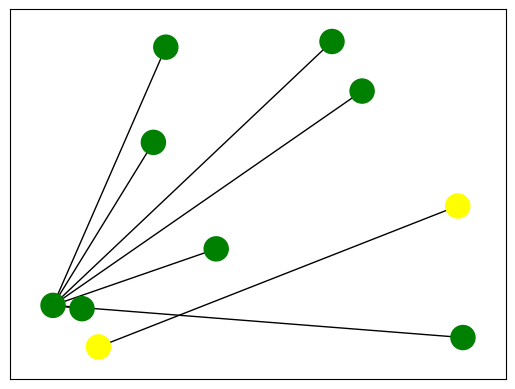

In [15]:
plot_graph(connection_pairs[:8], labels, i)

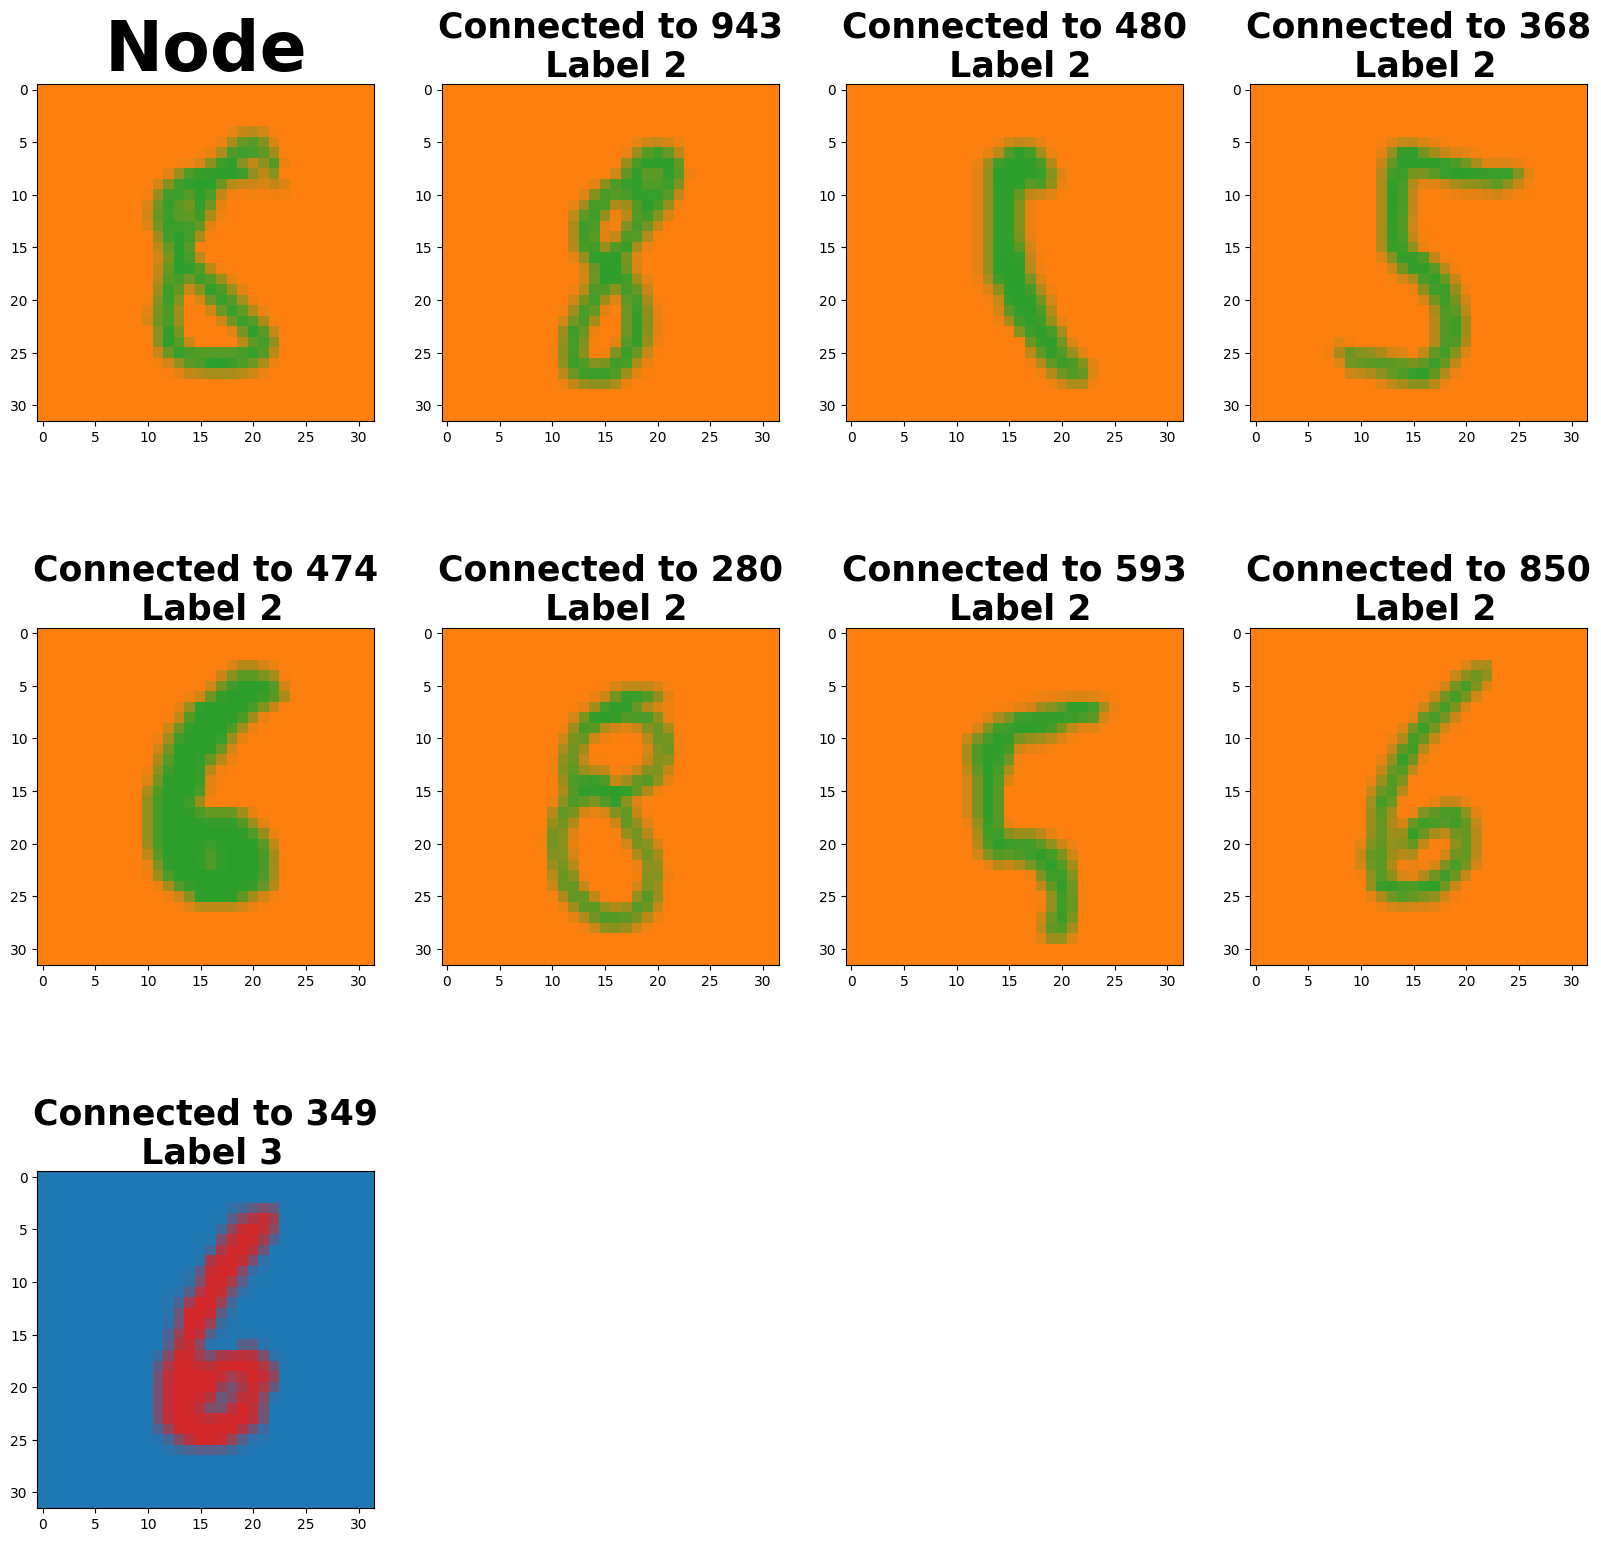

In [16]:
features_ = features.reshape(len(features), 3, 32, 32)
visualize_per_node_connections(features_, connection_pairs[:8], labels)